<a href="https://colab.research.google.com/github/Abhishekauti21/greyatomcodes/blob/master/Day_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [3]:
data=pd.read_csv('/content/adult_test.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16282 entries, 0 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             16282 non-null  object 
 1   Workclass       15318 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   Education       16281 non-null  object 
 4   Education_Num   16281 non-null  float64
 5   Martial_Status  16281 non-null  object 
 6   Occupation      15315 non-null  object 
 7   Relationship    16281 non-null  object 
 8   Race            16281 non-null  object 
 9   Sex             16281 non-null  object 
 10  Capital_Gain    16281 non-null  float64
 11  Capital_Loss    16281 non-null  float64
 12  Hours_per_week  16281 non-null  float64
 13  Country         16007 non-null  object 
 14  Target          16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


In [5]:
data.describe()

,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
count,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [6]:
data2=pd.read_csv('/content/adult_train.csv')

In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
data2.describe()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
data2.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
dataframe_con = data2.select_dtypes(include=np.number)
dataframe_cat = data2.select_dtypes(exclude=np.number)


In [11]:
data2.describe()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
dataframe_con


,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [14]:
dataframe_cat

,Workclass,Education,Martial_Status,Occupation,Relationship,Race,Sex,Country,Target
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [17]:
data2.count()

Age               32561
Workclass         30725
fnlwgt            32561
Education         32561
Education_Num     32561
Martial_Status    32561
Occupation        30718
Relationship      32561
Race              32561
Sex               32561
Capital_Gain      32561
Capital_Loss      32561
Hours_per_week    32561
Country           31978
Target            32561
dtype: int64

In [18]:
dataframe_cat.count()

Workclass         30725
Education         32561
Martial_Status    32561
Occupation        30718
Relationship      32561
Race              32561
Sex               32561
Country           31978
Target            32561
dtype: int64

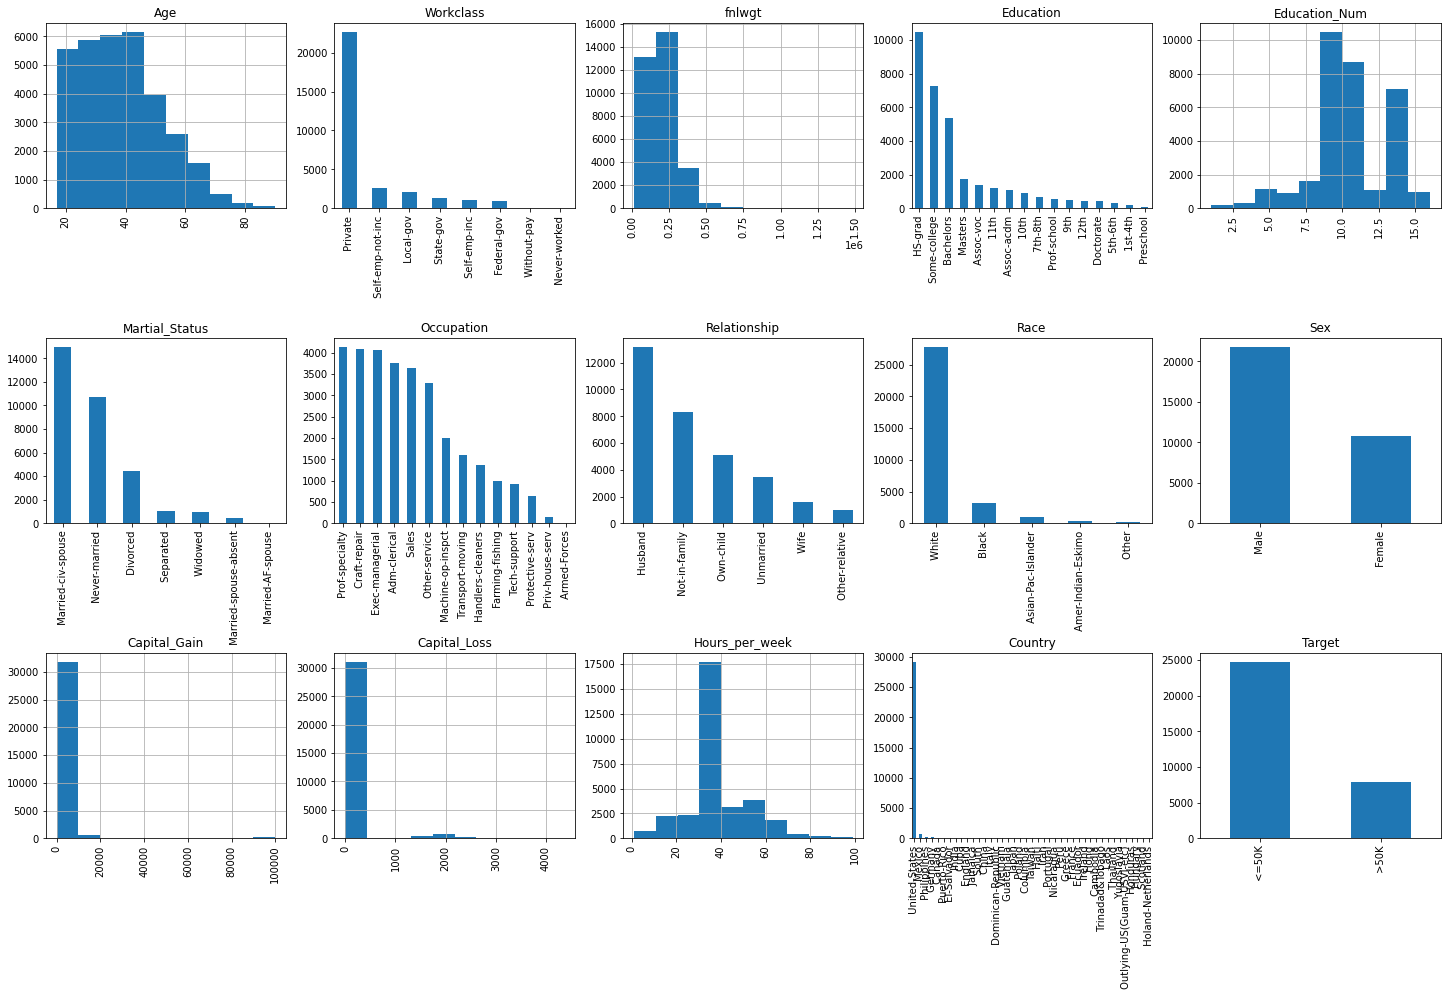

In [21]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(data2.shape[1]) / cols)
for i, column in enumerate(data2.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data2.dtypes[column] == np.object:
        data2[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data2[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)


In [25]:
 #necessary to remove rows with incorrect labels in test dataset
data = data[(data['Target'] == ' >50K.') | (data['Target']==' <=50K.')]

In [26]:
# encode target variable as integer
data2.loc[data2['Target']==' <=50K', 'Target'] = 0
data2.loc[data2['Target']==' >50K', 'Target'] = 1
data.loc[data['Target']==' <=50K.', 'Target'] = 0
data.loc[data['Target']==' >50K.', 'Target'] = 1

In [29]:
# choose categorical and continuous features from data
categorical_columns = [c for c in data2.columns
                       if data2[c].dtype.name == 'object']
numerical_columns = [c for c in data2.columns
                     if data2[c].dtype.name != 'object']
print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)

categorical_columns: ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Target']
numerical_columns: ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']


In [30]:
# fill missing data
 
for c in categorical_columns:
   data2[c].fillna(data2[c].mode()[0], inplace=True)
   data[c].fillna(data2[c].mode()[0], inplace=True)
  
for c in numerical_columns:
   data2[c].fillna(data2[c].median(), inplace=True)
   data[c].fillna(data2[c].median(), inplace=True)

In [31]:
from sklearn.preprocessing import LabelEncoder
 
le = LabelEncoder()
 
for x in categorical_columns:
   data2[x] = le.fit_transform(data2[x])
   data[x] = le.transform(data[x])


In [32]:
pd.get_dummies(data=data2,columns=categorical_columns).shape

(32561, 107)

In [34]:
data2=pd.concat([data2[numerical_columns],
      pd.get_dummies(data2[categorical_columns])],axis=1)

data=pd.concat([data[numerical_columns],
     pd.get_dummies(data[categorical_columns])],axis=1)

In [35]:
data2.shape

(32561, 15)

In [36]:
X_train=data2.drop(['Target'],axis=1)
y_train=data2['Target']

X_test=data.drop(['Target'],axis=1)
y_test=data['Target']

In [37]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score

In [38]:
tree=DecisionTreeClassifier(max_depth=3,random_state=17)
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [39]:
tree_predictions=tree.predict(X_test)

In [40]:
print("Decision Tree accuracy:",accuracy_score(y_test,tree_predictions))

Decision Tree accuracy: 0.839199066396413


In [41]:
tree_params={'max_depth':range(2,11)}
locally_best_tree=GridSearchCV(DecisionTreeClassifier(random_state=17),tree_params,cv=5)
locally_best_tree.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(2, 11)}, pre_dispatch='2*n_jobs',
  

In [43]:
print("Best_params:",locally_best_tree.tree_params_)
print("Best cross validation score:",locally_best_tree.best_score_)

AttributeError: ignored

In [48]:
from IPython.display import Image 
from sklearn import tree
import pydotplus
 
# Create DOT data
dot_data = tree.export_graphviz(tree_params, out_file=None,
                               feature_names=X_train.columns, filled = True, 
                               class_names=['class_yes','class_no'])
 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data) 
 
# Show graph
Image(graph.create_png())



TypeError: ignored